## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [2]:
!pip install nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.3 MB/s eta 0:00:00


In [3]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.15.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [5]:
!pip install datasets
from datasets import load_dataset

dataset = load_dataset("dair-ai/emotion")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.3 MB/s eta 0:00:00
  Attempting uninstall: dill
    Found existing installation: dill 0.3.8
    Uninstalling dill-0.3.8:
      Successfully uninstalled dill-0.3.8


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1429: FutureWarning: The repository for dair-ai/emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/dair-ai/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [6]:

dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [7]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [8]:
def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets, labels

In [9]:
tweets, labels = get_tweet(train)
tweets[10], labels[10]

('i feel like i have to make the suffering i m seeing mean something', 0)

## Task 4: Tokenizer

1. Tokenizing the tweets

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)


In [11]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

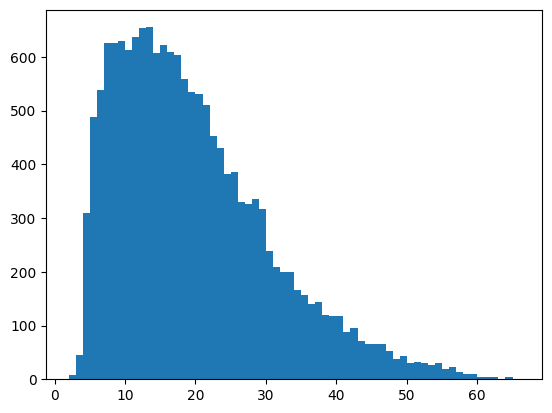

In [12]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths,bins = len(set(lengths)))
plt.show()

In [13]:
maxlen = 50

from tensorflow.keras.preprocessing.sequence import pad_sequences
def get_sequences(tokenizer,tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating = 'post',padding = 'post', maxlen=maxlen)
  return padded



In [14]:
padded_train_seq = get_sequences(tokenizer, tweets)

In [15]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

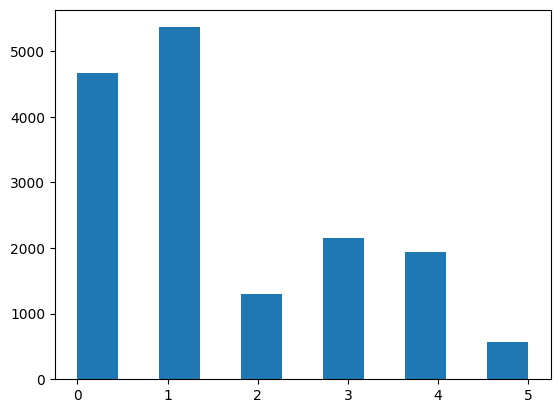

In [16]:
plt.hist(labels,bins = 11)
plt.show()

## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length = maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(20, activation='tanh')),
    tf.keras.layers.Dense(6,activation='softmax')
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [18]:
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)


In [51]:
val_tweets[0],val_labels[0]



('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [34]:
padded_train_seq = np.array(padded_train_seq)
labels = np.array(labels)
val_seq = np.array(val_seq)
val_labels = np.array(val_labels)
h = model.fit(
    padded_train_seq, labels,
    validation_data = (val_seq, val_labels),
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',patience = 2)
    ]
)

Epoch 1/20
500/500 [==============================] - 34s 54ms/step - loss: 1.2829 - accuracy: 0.4868 - val_loss: 0.7550 - val_accuracy: 0.7370
Epoch 2/20
500/500 [==============================] - 9s 19ms/step - loss: 0.5274 - accuracy: 0.8194 - val_loss: 0.5331 - val_accuracy: 0.8240
Epoch 3/20
500/500 [==============================] - 9s 17ms/step - loss: 0.3251 - accuracy: 0.8919 - val_loss: 0.4746 - val_accuracy: 0.8445
Epoch 4/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2288 - accuracy: 0.9253 - val_loss: 0.4565 - val_accuracy: 0.8655
Epoch 5/20
500/500 [==============================] - 8s 16ms/step - loss: 0.1670 - accuracy: 0.9481 - val_loss: 0.4360 - val_accuracy: 0.8745
Epoch 6/20
500/500 [==============================] - 8s 15ms/step - loss: 0.1258 - accuracy: 0.9596 - val_loss: 0.4312 - val_accuracy: 0.8840
Epoch 7/20
500/500 [==============================] - 7s 14ms/step - loss: 0.1002 - accuracy: 0.9676 - val_loss: 0.4468 - val_accuracy: 0.884

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

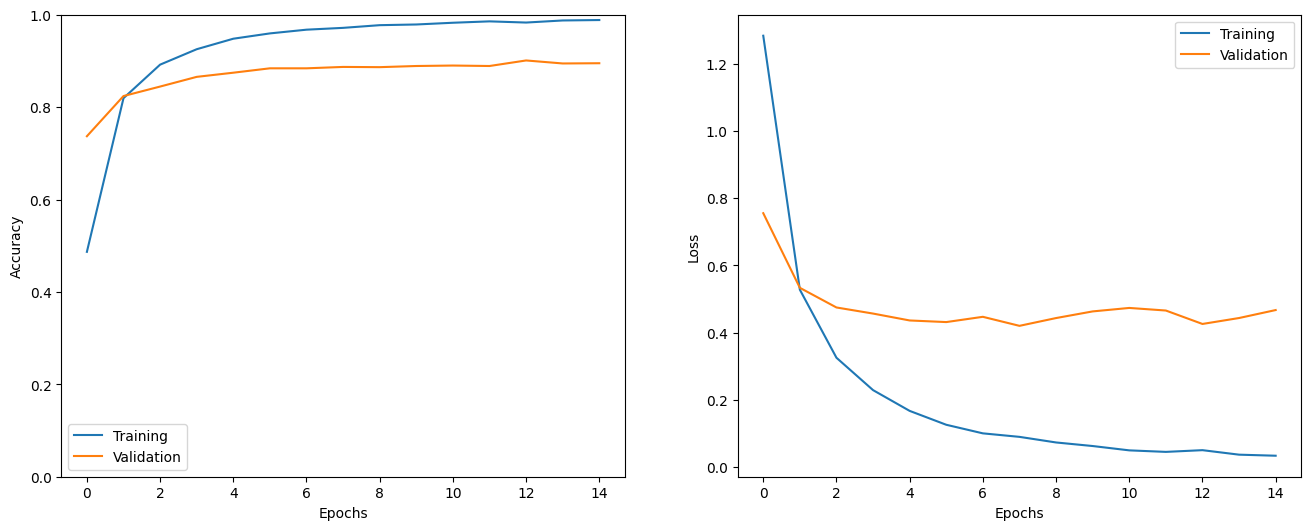

In [35]:
show_history(h)

In [42]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer,test_tweets)
test_seq=np.array(test_seq)
test_labels= np.array(test_labels)

In [43]:
_ = model.evaluate(test_seq, test_labels)

63/63 [==============================] - 1s 8ms/step - loss: 0.4569 - accuracy: 0.8855


In [45]:
# Define your dataset
emotions = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
indexes = [0, 1, 2, 3, 4, 5]

# Create a dictionary using the zip function
emotion_dict = dict(zip( indexes,emotions))

# Print the resulting dictionary
print(emotion_dict)


{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}


In [48]:
i = random.randint(0,len(test_labels)-1)
print("Sentence:",test_tweets[i])
print("Emotion:",emotion_dict[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i],axis=0))[0]
pred_class = emotion_dict[np.argmax(p).astype('uint8')]

print('Predicted Emotion:',pred_class)

Sentence: i know she shes the only one who provides income to my family right now but it feels like shes putting it up in our face that shes supporting us
Emotion: joy
1/1 [==============================] - 0s 37ms/step
Predicted Emotion: joy


63/63 [==============================] - 0s 6ms/step


ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (16000).

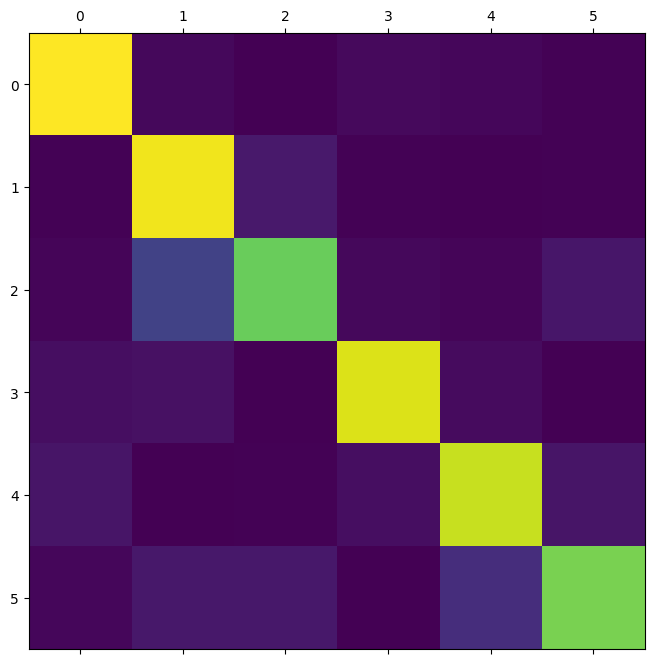

In [55]:
preds = model.predict(test_seq)
preds = np.argmax(preds, axis=-1)
show_confusion_matrix(test_labels,preds,list(labels))